In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

ClothingData = pd.read_csv("C:\\Users\\Dell\\Documents\\Lab 2\\ClothingDataset\\images.csv")

ClothingData = ClothingData.drop('sender_id', axis=1)
ClothingData = ClothingData.drop('kids', axis=1)

ClothingData




,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes
...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,Shorts
5399,befa14be-8140-4faf-8061-1039947e329d,Body
5400,5379356a-40ee-4890-b416-2336a7d84061,Shorts
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,Shoes


In [5]:
path1="C:\\Users\\Dell\\Documents\\Lab 2\\ClothingDataset\\"
path2="C:\\Users\\Dell\\Documents\\Lab 2\\ClothingDataset\\images_compressed"
path = os.path.join(path1,"image_set1")
os.mkdir(path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Dell\\Documents\\Lab 2\\ClothingDataset\\image_set1'

In [103]:
n = 0
for i in range(0,len(ClothingData)):
    
    try: 
        #get image and save as grayscale
        id_label = ClothingData.loc[i,'image']
        #print(id_label)
        img=Image.open(os.path.join(path2,id_label)+".jpg").convert('L')
        basewidth = 300
        wpercent = (basewidth / float(img.size[0]))
        hsize = int((float(img.size[1]) * float(wpercent)))
        img = img.resize((basewidth, hsize), Image.ANTIALIAS)
        path3 = os.path.join(path,id_label)
        img.save(path3+".jpg") # and save to target folder 
        
    except:
        n = n+1
        
print("unreadable files: "+str(n))

C:\Users\Dell\AppData\Local\Temp\ipykernel_13188\2118742480.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize), Image.ANTIALIAS)


unreadable files: 5


In [ ]:
images = []
labels_arr = []

path1="C:\\Users\\Dell\\Documents\\Lab 2\\ClothingDataset\\image_set1"
for filename in os.listdir(path1):
    
    # reading images from folder image_set1
    image =cv2.imread(f'{path1}/{filename}')

    #resizing the image
    image_rs = cv2.resize(image,(256,256))

    #storing images
    images.append(image_rs)
    
    #storing labels
    image_name = filename.removesuffix(".jpg")
    clothing_label_instance = ClothingData.loc[ClothingData['image'] == image_name]
    labels_arr.append(clothing_label_instance.label)
    
    

#stack images to single array
images_arr = np.stack(images)
np.stack(images).shape

fig, axis = plt.subplots(nrows=1, ncols=3)
axis[0].imshow(images_arr[0], cmap='Greys')
axis[1].imshow(images_arr[1], cmap='Greys')
axis[2].imshow(images_arr[2], cmap='Greys')
plt.show()

#Flatting array along columns
features = images_arr.reshape((len(labels_arr), -1))
print(f'\nfeatures: {features.shape}')
labels = labels_arr.reshape((len(labels_arr), -1))
print(f'labels: {labels.shape}')

df = pd.DataFrame(data=features, columns=['pixels_'+str(i+1) for i in range(features.shape[1])])
print(f'\ndf: {df.shape}')
images_arr


In [ ]:
features[0]

In [55]:
images_arr.shape
labels_arr.shape
images_arr[0]

array([[[46, 46, 46],
        [46, 46, 46],
        [46, 46, 46],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [33, 33, 33]],

       [[46, 46, 46],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [36, 36, 36],
        [35, 35, 35],
        [34, 34, 34]],

       [[47, 47, 47],
        [47, 47, 47],
        [48, 48, 48],
        ...,
        [33, 33, 33],
        [31, 31, 31],
        [30, 30, 30]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[70, 70, 70],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[70, 70, 70],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)

In [58]:
images[0]

array([[[46, 46, 46],
        [46, 46, 46],
        [46, 46, 46],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [33, 33, 33]],

       [[46, 46, 46],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [36, 36, 36],
        [35, 35, 35],
        [34, 34, 34]],

       [[47, 47, 47],
        [47, 47, 47],
        [48, 48, 48],
        ...,
        [33, 33, 33],
        [31, 31, 31],
        [30, 30, 30]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[70, 70, 70],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[70, 70, 70],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)

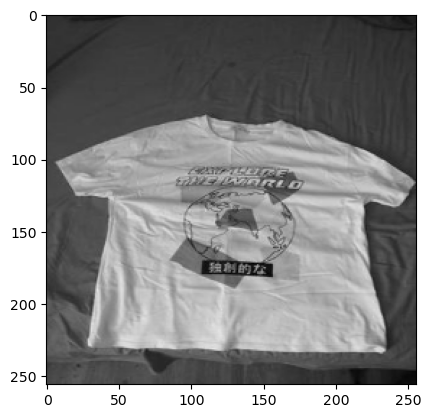

In [84]:
import matplotlib as mpl

image1 = images_arr[0]
plt.imshow(image1, cmap=mpl.cm.binary)
plt.show()

In [16]:
images_arr_train, images_arr_test, labels_arr_train, labels_arr_test = images_arr[:4000], images_arr[4000:], labels_arr[:4000], labels_arr[4000:] 
    

In [93]:
images_arr_train[0]

array([[[46, 46, 46],
        [46, 46, 46],
        [46, 46, 46],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [33, 33, 33]],

       [[46, 46, 46],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [36, 36, 36],
        [35, 35, 35],
        [34, 34, 34]],

       [[47, 47, 47],
        [47, 47, 47],
        [48, 48, 48],
        ...,
        [33, 33, 33],
        [31, 31, 31],
        [30, 30, 30]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[70, 70, 70],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[70, 70, 70],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)

In [ ]:
img_train, img_test = [],[]
for i in range(0,4000):
    img_train.append(images_arr_train[i].astype('float')/255)
    
for i in range(4000,len(ClothingData))
    img_test.append(images_arr_test[i].astype('float')/255)


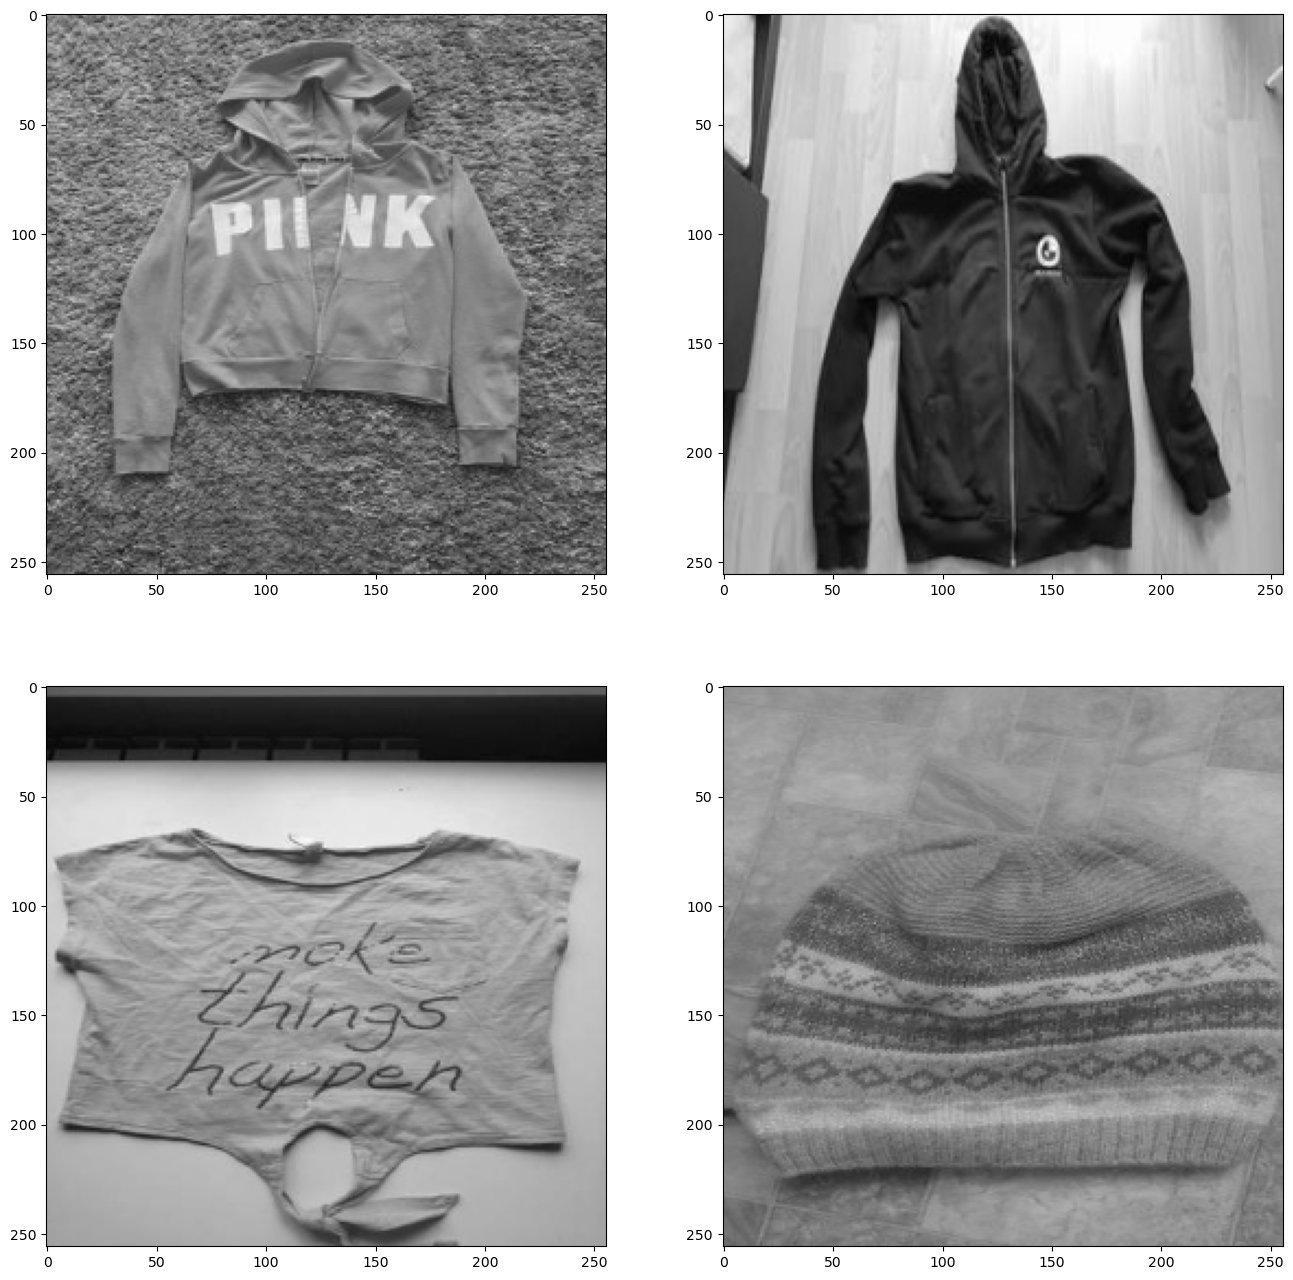

In [107]:
f, axarr = plt.subplots(2,2,figsize=(16, 16))

axarr[0,0].imshow(img_train[1],cmap='gist_gray')
axarr[0,1].imshow(img_train[10],cmap='gist_gray')
axarr[1,0].imshow(img_train[100],cmap='gist_gray')
axarr[1,1].imshow(img_train[1000],cmap='gist_gray')

In [18]:
print(labels_arr_train[1])
print(labels_arr_train[10])
print(labels_arr_train[100])
print(labels_arr_train[1000])

4344    Hoodie
Name: label, dtype: object
3966    Hoodie
Name: label, dtype: object
16    Top
Name: label, dtype: object
471    Hat
Name: label, dtype: object


In [22]:
#Applying Binary Classifier

images_arr_train, images_arr_test, labels_arr_train, labels_arr_test = images_arr[:4000], images_arr[4000:], labels_arr[:4000], labels_arr[4000:] 

labels_arr_train_Top = (labels_arr_train == "Top") 
labels_arr_test_Top = (labels_arr_test == "Top")



False

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(images_arr_train, labels_arr_train_Top)

ValueError: y should be a 1d array, got an array of shape () instead.